<a href="https://colab.research.google.com/github/prathamgrover7/Celestial_Body_Hunt/blob/main/predicting_star_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install catboost

## Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier 
import seaborn as sns
import plotly.express as px






## Importing the CSV file

In [3]:
df = pd.read_csv('star_type - Sheet1.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Spectral Class
0,3068,0.002400,0.1700,16.12,M
1,3042,0.000500,0.1542,16.60,M
2,2600,0.000300,0.1020,18.70,M
3,2800,0.000200,0.1600,16.65,M
4,1939,0.000138,0.1030,20.06,M


## Checking out for datatype and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [6]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Spectral Class            0
dtype: int64

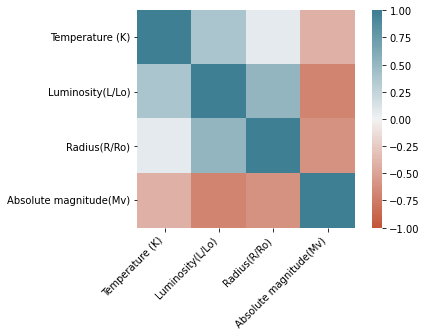

In [7]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Assigning features and Labels

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


## Performing Categorical Encoding on Label

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)



[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 0 2 0 1 2 0 2 2 2 6 1 1 1 2 0 2
 2 2 2 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 2 2 0 1 1 0 1 1 2 1 2 4 4 4 0 0 4 2 0 6 1 6 6 6 6 6 6 6 6 6 5
 5 5 5 5 5 4 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 0 1 2
 0 1 1 0 0 1 1 1 1 1 0 6 6 6 6 6 6 6 6 6 6 6 5 5 4 1 5 5 6 1 1 1 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 0 0 1 6 6 0 1 1 2 6 6
 6 6 6 6 6 6 6 6 1 6 6 1 1 6 6 0 0 6]


## Data Visualisation

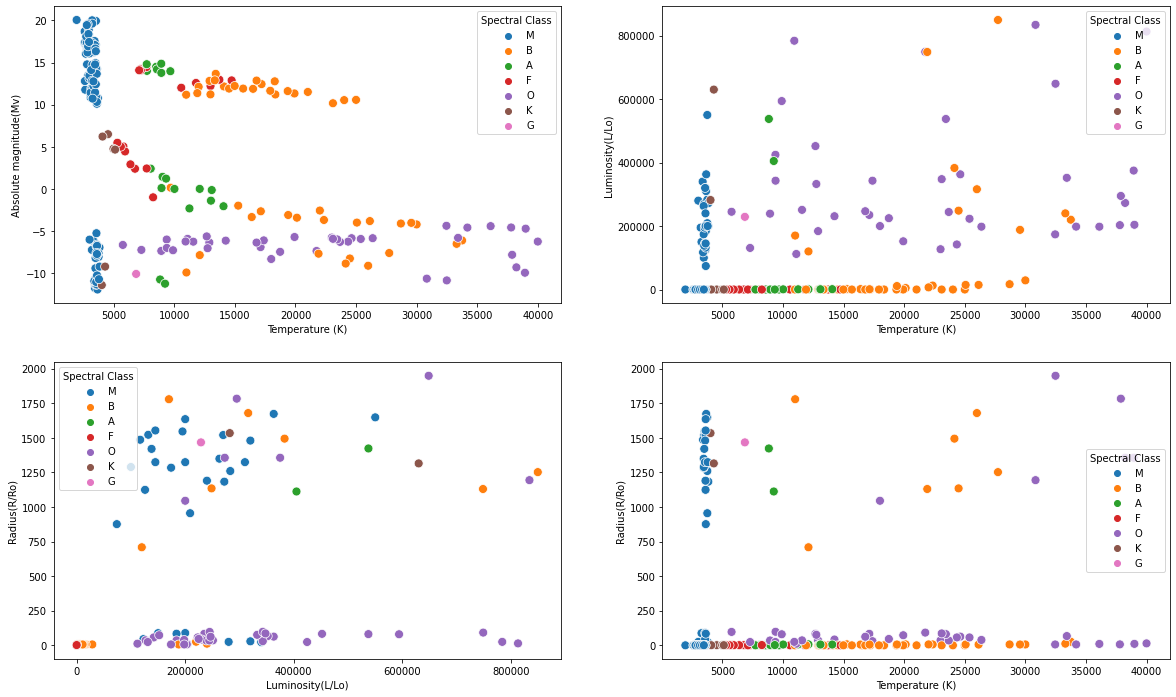

In [10]:
fig, axes = plt.subplots(2,2,  figsize=(20,12))
axes[0,0].set_xlabel('Temperature (K)')
axes[0,0].set_ylabel('Absolute magnitude(Mv)')
sns.scatterplot(x = 'Temperature (K)',
                y = 'Absolute magnitude(Mv)',
                hue = 'Spectral Class' ,
                s = 80,
                data = df, 
                ax = axes[0][0])
                


axes[0,1].set_xlabel('Temperature (K)')
axes[0,1].set_ylabel('Luminosity(L/Lo)')
sns.scatterplot(x = 'Temperature (K)',
                y = 'Luminosity(L/Lo)',
                hue = 'Spectral Class',
                s = 80,
                data = df,
                ax = axes[0][1])



axes[1,1].set_xlabel('Temperature (K)')
axes[1,1].set_ylabel('Radius(R/Ro)')
sns.scatterplot(x = 'Temperature (K)',
                y = 'Radius(R/Ro)',
                hue = 'Spectral Class',
                s = 80,
                data = df,
                ax = axes[1][1])


axes[1,0].set_xlabel('Luminosity(L/Lo)')
axes[1,0].set_ylabel('Radius(R/Ro)')
sns.scatterplot(x = 'Luminosity(L/Lo)',
                y = 'Radius(R/Ro)',
                hue = 'Spectral Class',
                s = 80,
                data = df,
                ax = axes[1][0])






## Hertzprung-Russell Diagram

In [11]:
df['Type Names']= df['Spectral Class']
fig = px.scatter(df, 
                 x="Temperature (K)",
                 y="Luminosity(L/Lo)", 
                 hover_name="Type Names",
                 color="Type Names",
                 log_x=True, 
                 log_y=True, 
                 template = 'plotly_dark',
                 title='Luminosity vs. Surface Temperature ')
fig.show()

In [12]:
fig = px.bar(df, 
             x = 'Spectral Class',
             color="Temperature (K)",
             hover_name="Type Names",
             template = 'plotly_dark', 
             title='Spectral Type vs temperature')
fig.show()

In [13]:
fig = px.scatter(df,
                 x="Spectral Class",
                 y='Radius(R/Ro)', 
                 color="Type Names",
                  size_max=200,
                 template='plotly_dark', 
                 title='Star Type vs Radius')
fig.show()

## Splitting the data for Training and Testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 3)

## Data Modeling

KNN Classifier


In [15]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100


95.0

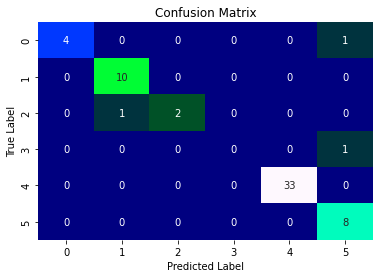

In [17]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,annot=True,cbar=False, cmap = 'gist_ncar')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.91      1.00      0.95        10
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        33
           6       0.80      1.00      0.89         8

    accuracy                           0.95        60
   macro avg       0.78      0.74      0.76        60
weighted avg       0.94      0.95      0.94        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [19]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.00 %
Standard Deviation: 10.61 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



Decision Tree Classifier

In [20]:
classifier = DecisionTreeClassifier(criterion= 'entropy',random_state=2 )
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [21]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100


96.66666666666667

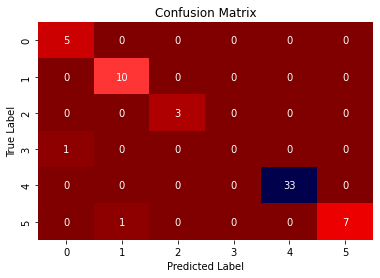

In [22]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,annot=True,cbar=False, cmap = 'seismic_r')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        33
           6       1.00      0.88      0.93         8

    accuracy                           0.97        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.95      0.97      0.96        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [24]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.33 %
Standard Deviation: 7.22 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



Random Forest Classifier

In [25]:
classifier = RandomForestClassifier(n_estimators = 20,criterion = 'entropy',random_state = 3)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [26]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

98.33333333333333

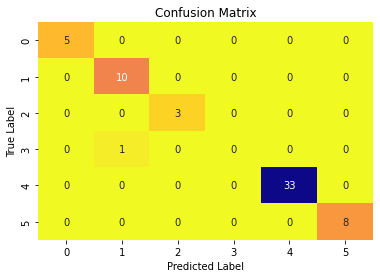

In [27]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,annot=True,cbar=False,cmap = 'plasma_r')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00         8

    accuracy                           0.98        60
   macro avg       0.82      0.83      0.83        60
weighted avg       0.97      0.98      0.98        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [29]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



Accuracy: 89.44 %
Standard Deviation: 7.22 %


XGB Classifier

In [30]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

98.33333333333333

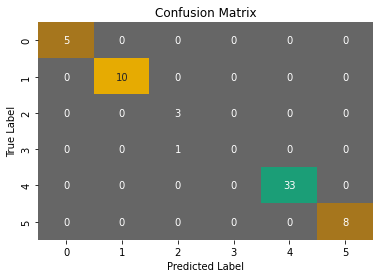

In [32]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,annot=True,cbar=False, cmap = 'Dark2_r')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00         8

    accuracy                           0.98        60
   macro avg       0.79      0.83      0.81        60
weighted avg       0.97      0.98      0.98        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [34]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



Accuracy: 90.00 %
Standard Deviation: 6.48 %


Cat Boost Classifier

In [35]:
classifier = CatBoostClassifier()
classifier.fit(X_train,y_train)

Learning rate set to 0.072501
0:	learn: 1.6734884	total: 50.8ms	remaining: 50.7s
1:	learn: 1.5672274	total: 53.9ms	remaining: 26.9s
2:	learn: 1.4614622	total: 57.9ms	remaining: 19.2s
3:	learn: 1.3688362	total: 61ms	remaining: 15.2s
4:	learn: 1.2998167	total: 64ms	remaining: 12.7s
5:	learn: 1.2365842	total: 69ms	remaining: 11.4s
6:	learn: 1.1816009	total: 74.2ms	remaining: 10.5s
7:	learn: 1.1264953	total: 77.2ms	remaining: 9.57s
8:	learn: 1.0758849	total: 80.2ms	remaining: 8.83s
9:	learn: 1.0273645	total: 83.2ms	remaining: 8.24s
10:	learn: 0.9870182	total: 86.3ms	remaining: 7.76s
11:	learn: 0.9463776	total: 89.2ms	remaining: 7.34s
12:	learn: 0.9134634	total: 92ms	remaining: 6.99s
13:	learn: 0.8808585	total: 94.9ms	remaining: 6.68s
14:	learn: 0.8533651	total: 97.8ms	remaining: 6.42s
15:	learn: 0.8252432	total: 101ms	remaining: 6.2s
16:	learn: 0.7969078	total: 104ms	remaining: 6.02s
17:	learn: 0.7704008	total: 107ms	remaining: 5.85s
18:	learn: 0.7472391	total: 110ms	remaining: 5.69s
19:	l

In [36]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

96.66666666666667

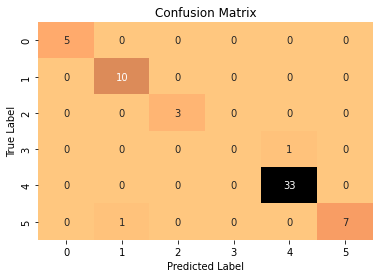

In [37]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,annot=True,cbar=False, cmap = 'copper_r')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           5       0.97      1.00      0.99        33
           6       1.00      0.88      0.93         8

    accuracy                           0.97        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.95      0.97      0.96        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



Streaming output truncated to the last 5000 lines.
6:	learn: 1.2182040	total: 25.6ms	remaining: 3.63s
7:	learn: 1.1519615	total: 28.4ms	remaining: 3.52s
8:	learn: 1.1016304	total: 31.4ms	remaining: 3.46s
9:	learn: 1.0601479	total: 34.6ms	remaining: 3.43s
10:	learn: 1.0201234	total: 37.6ms	remaining: 3.38s
11:	learn: 0.9796376	total: 40.4ms	remaining: 3.32s
12:	learn: 0.9498036	total: 43.2ms	remaining: 3.28s
13:	learn: 0.9126935	total: 46.2ms	remaining: 3.25s
14:	learn: 0.8805295	total: 49ms	remaining: 3.22s
15:	learn: 0.8517915	total: 52ms	remaining: 3.2s
16:	learn: 0.8218883	total: 55ms	remaining: 3.18s
17:	learn: 0.7943409	total: 57.9ms	remaining: 3.16s
18:	learn: 0.7685242	total: 60.8ms	remaining: 3.14s
19:	learn: 0.7461891	total: 61.9ms	remaining: 3.03s
20:	learn: 0.7271366	total: 64.9ms	remaining: 3.03s
21:	learn: 0.7048194	total: 67.9ms	remaining: 3.02s
22:	learn: 0.6847059	total: 71ms	remaining: 3.01s
23:	learn: 0.6639027	total: 73.8ms	remaining: 3s
24:	learn: 0.6444113	total: 7

# -----------------------------------------------------------------------------------------